In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('crime_data.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [4]:
df = remove_outliers_iqr(df, 'Rape')


<Axes: >

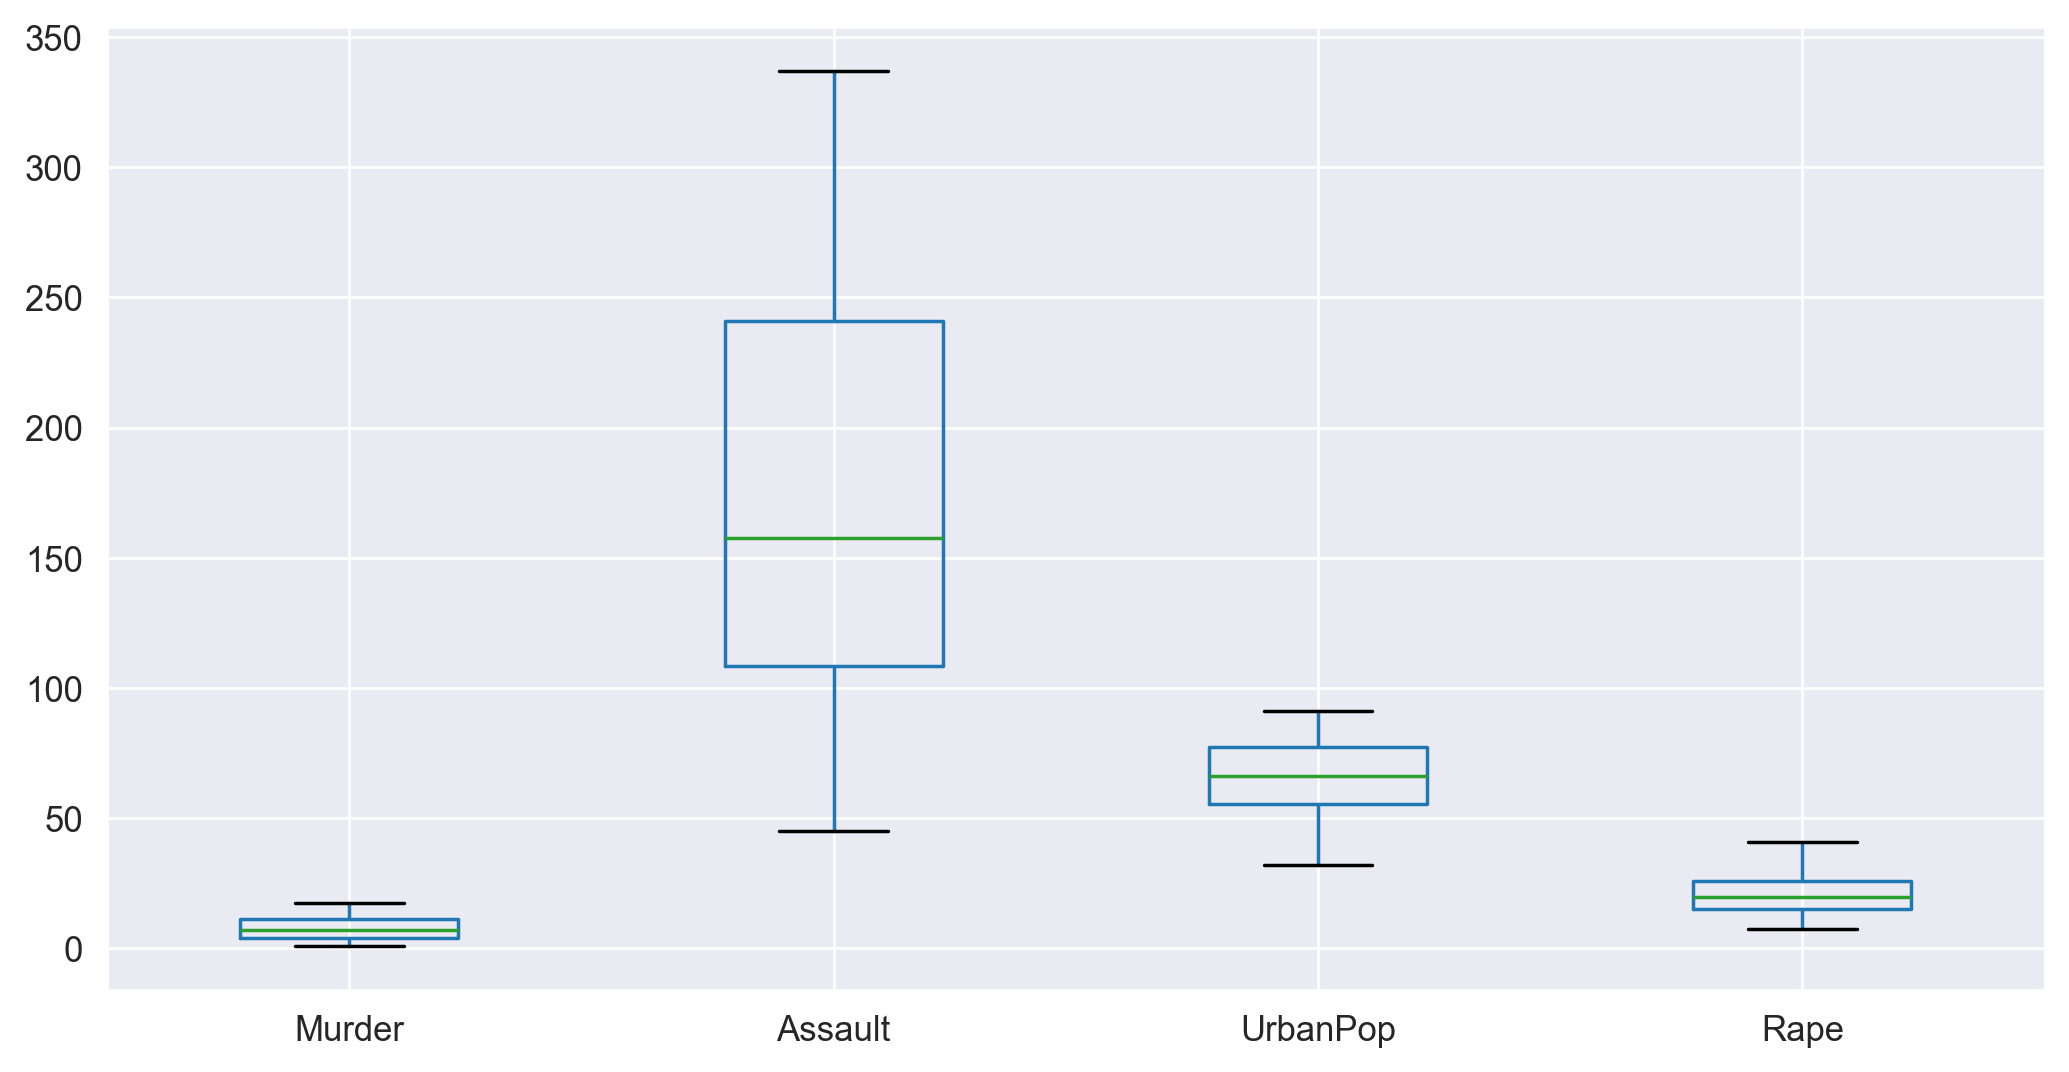

In [5]:
df.boxplot()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.27868078,  0.83731972, -0.53291148,  0.12062732],
       [ 0.10367682,  1.54264441,  1.01311744,  1.34090882],
       [ 0.26495187,  0.27792428, -1.09510382, -0.09105417],
       [ 0.31103046,  1.32375054,  1.7861319 ,  2.53628661],
       [ 0.05759823,  0.44817506,  0.87256935,  2.29970142],
       [-1.00220926, -0.69493736,  0.80229531, -1.13700974],
       [-0.40318763,  0.86164126,  0.4509251 , -0.55177269],
       [ 1.78554524,  2.041236  ,  1.01311744,  1.45297549],
       [ 2.24633111,  0.53330046, -0.3923634 ,  0.69341251],
       [-0.5414234 , -1.47322668,  1.22393956, -0.0038912 ],
       [-1.16348432, -0.57332966, -0.81400765, -0.75100233],
       [ 0.63358057,  0.99540974,  1.22393956,  0.46927917],
       [-0.10367682, -0.65845505, -0.04099319,  0.09572361],
       [-1.25564149, -1.35161897, -0.60318553, -1.11210604],
       [-0.38014834, -0.63413351,  0.02928085, -0.27783195],
       [ 0.47230552, -0.70709814, -0.95455574, -0.48951343],
       [ 1.78554524,  0.

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([7, 2, 6, 2, 2, 1, 3, 2, 7, 1, 5, 2, 4, 5, 4, 6, 7, 5, 2, 3, 2, 1,
       0, 4, 6, 1, 5, 3, 2, 2, 0, 5, 4, 4, 4, 1, 3, 0, 5, 7, 7, 4, 5, 6,
       4, 5, 1, 6])

In [10]:
len(yp)

48

In [11]:
km.cluster_centers_

array([[ 1.5781916 ,  1.51426928, -1.39962467, -0.20727145],
       [-0.8217348 , -1.04151932,  0.38065106, -0.68459245],
       [ 0.71293814,  1.28051224,  0.92722694,  1.45574256],
       [-0.54718322,  0.15631657,  1.24150807, -0.67629121],
       [-0.37438852, -0.35899608,  0.34551404,  0.3914551 ],
       [-1.14332494, -1.15704664, -1.28835743, -1.22105974],
       [ 0.07142181, -0.2693104 , -0.70156918, -0.3151875 ],
       [ 1.55054445,  0.60626508, -0.06910281,  0.5091251 ]])

In [12]:
km.inertia_

32.73694439461144

In [13]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [14]:
wcss

[192.0,
 102.00020911955329,
 75.65589964425514,
 52.988746851306026,
 45.24604034883646,
 40.500612831858696,
 36.78259059546739,
 32.23449556378215,
 29.172398800224595,
 25.58850116454773]

Text(0.5, 1.0, 'Elbow Graph')

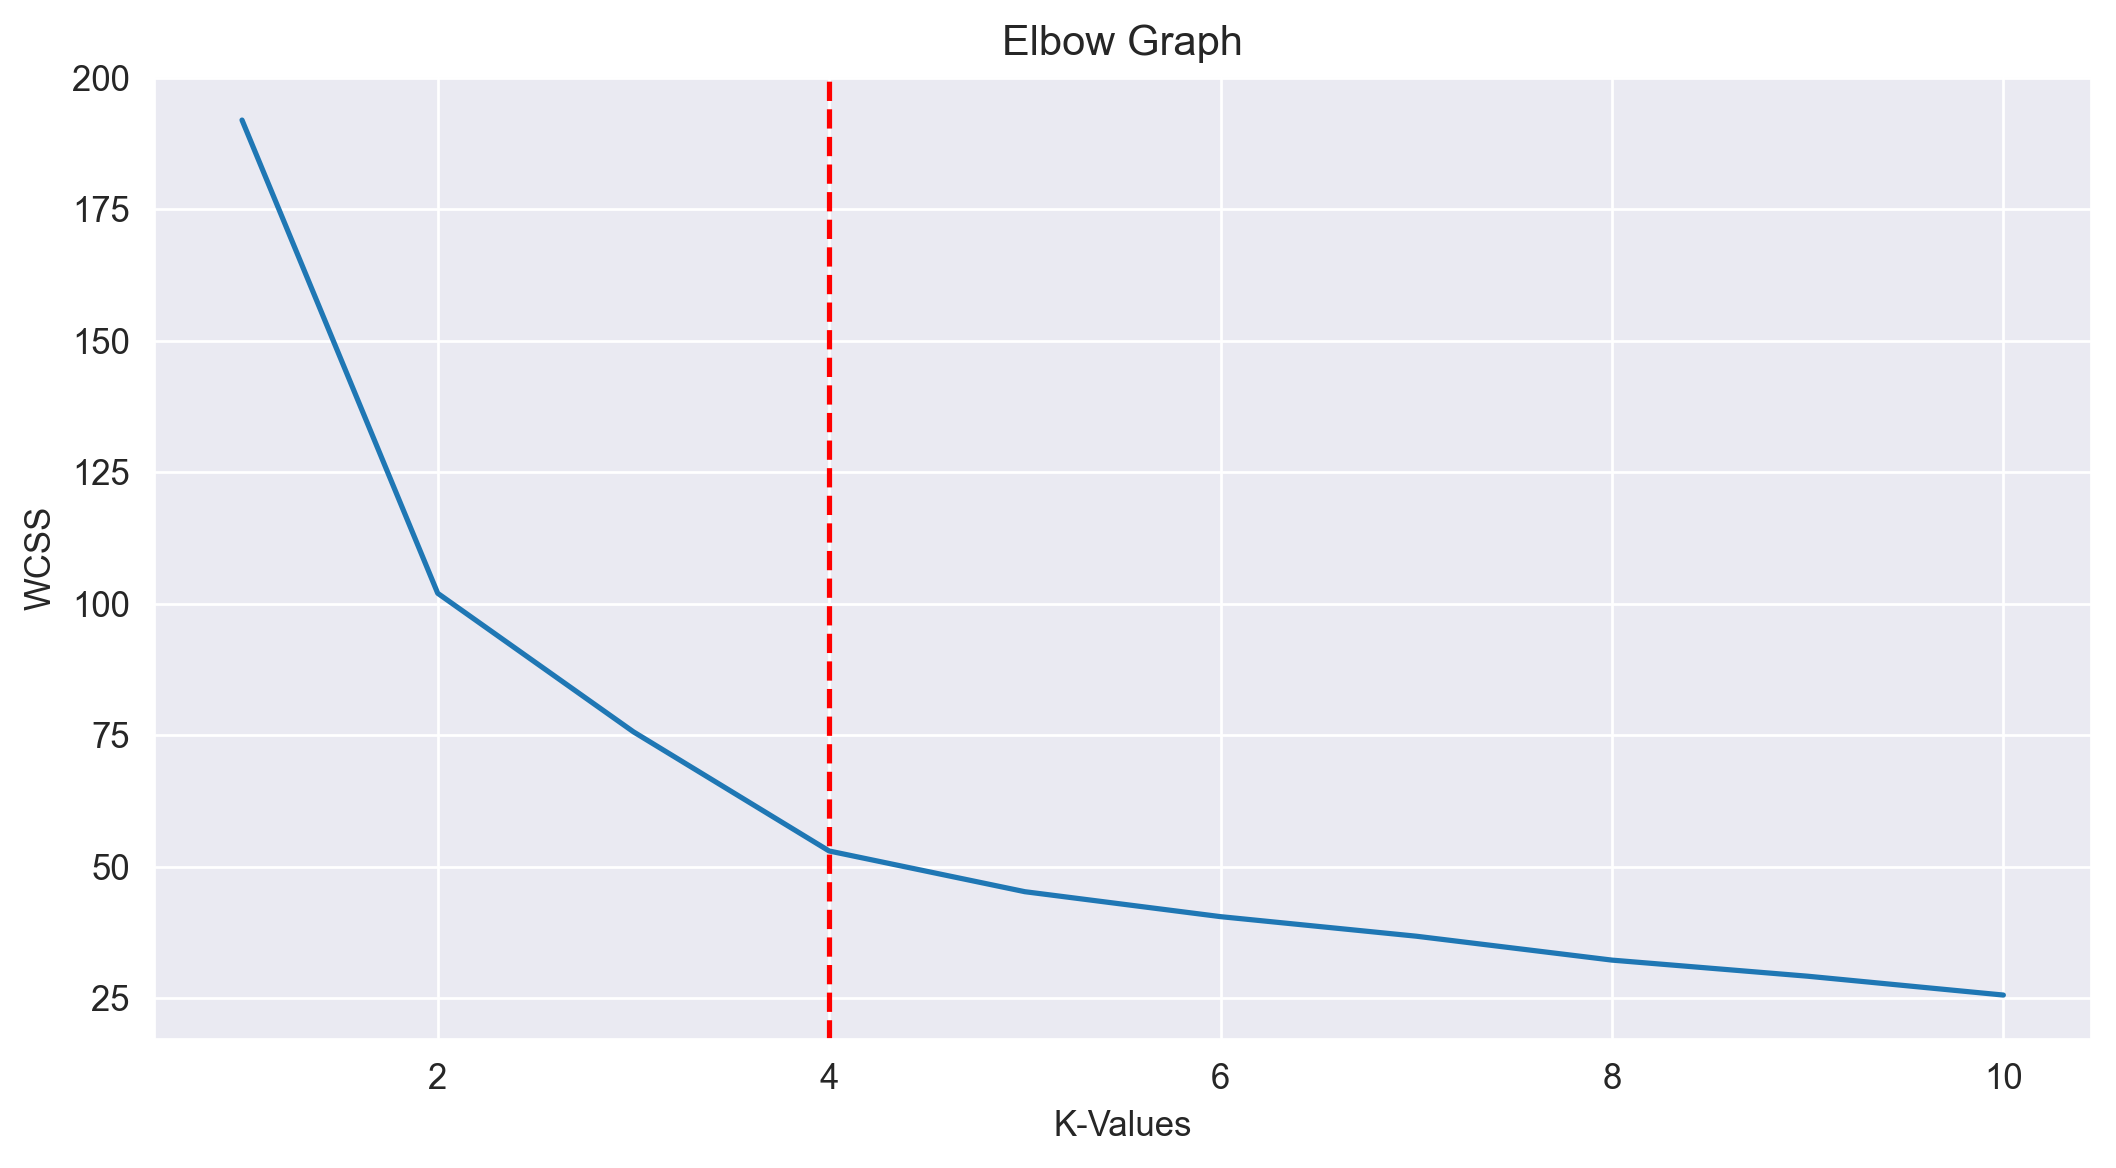

In [15]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [16]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([3, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0, 1,
       3, 0, 1, 1, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2, 1, 2,
       2, 1, 1, 2])

In [17]:
km.cluster_centers_

array([[ 0.71735982,  1.097118  ,  0.8789579 ,  1.34090882],
       [-0.93309138, -1.07753391, -0.94915004, -1.00291287],
       [-0.45934591, -0.34379512,  0.58268893, -0.18055185],
       [ 1.44859557,  0.93004559, -0.83157616,  0.1470875 ]])

In [18]:
km.inertia_

52.988746851306026

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(x,ypred)

0.3497231363023223

In [21]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3
Hawaii,5.3,46,83,20.2,2


In [22]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.763636,257.363636,78.090909,31.000000
1,3.600000,78.538462,52.076923,12.176923
2,5.656250,138.875000,73.875000,18.781250
3,13.937500,243.625000,53.750000,21.412500


In [23]:
df['cluster'].value_counts()

cluster
2    16
1    13
0    11
3     8
Name: count, dtype: int64